# Step – 1: Read the video, extract frames from it and save them as images


In [5]:
import cv2   
import tensorflow as tf
import math  
import matplotlib.pyplot as plt    
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    
from skimage.transform import resize

In [11]:
count = 0
videoFile = r"D:\Datasets\tom_and_jerry.mp4"
extraction_path=r"D:\Datasets\tom_jerry_frames"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename =extraction_path+"\\frame%d.jpg" % count
        count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done")

Done!


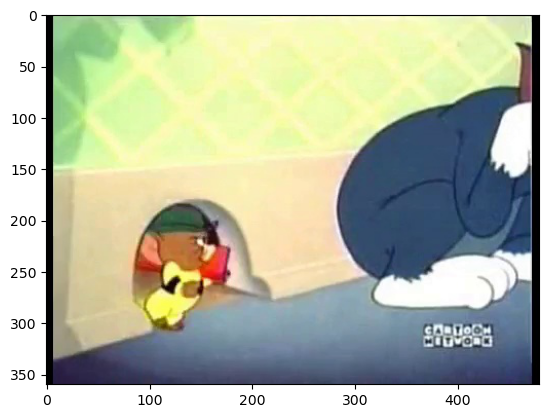

In [6]:
img = plt.imread(r"D:\Datasets\tom_jerry_frames\frame0.jpg")   # reading image using its name
plt.imshow(img)

 # Step – 2: Label a few images for training the model


In [107]:



# 1 for tom 
# 2 for jerry
# 0 for neither tom nor jerry
import pandas as pd

data = [['frame0.jpg', 2],
      ['frame1.jpg', 1],
      ['frame2.jpg', 1],
      ['frame3.jpg', 1],
      ['frame4.jpg', 1],
      ['frame5.jpg', 1],
      ['frame6.jpg', 1],
      ['frame7.jpg', 1],
      ['frame8.jpg', 1],
      ['frame9.jpg', 1],
      ['frame10.jpg',1],
      ['frame11.jpg', 1],
      ['frame12.jpg', 1],
      ['frame13.jpg', 1],
      ['frame14.jpg', 1],
      ['frame15.jpg', 1],
      ['frame16.jpg', 1],
      ['frame17.jpg', 1],
      ['frame18.jpg', 1],
      ['frame19.jpg', 1],
      ['frame20.jpg', 1],
      ['frame21.jpg', 1],
      ['frame22.jpg', 1],
      ['frame23.jpg', 1],
      ['frame24.jpg', 1],
      ['frame25.jpg', 1],
      ['frame26.jpg', 1],
      ['frame27.jpg', 1],
      ['frame28.jpg', 1],
      ['frame29.jpg', 1],
      ['frame30.jpg', 1],
      ['frame31.jpg', 0],
      ['frame32.jpg', 2],
      ['frame33.jpg', 0],
      ['frame34.jpg', 0],
      ['frame35.jpg', 1]]

data = pd.DataFrame(data, columns=['Image_ID', 'Class'])

# Change the value of the class for frame1 to 0
data.loc[data['Image_ID'] == 'frame1', 'Class'] = 0

data.head()

,Image_ID,Class
0,frame0.jpg,2
1,frame1.jpg,1
2,frame2.jpg,1
3,frame3.jpg,1
4,frame4.jpg,1


In [109]:
# read the images based on names( the Image_ID column )
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread(r'D:\Datasets\tom_jerry_frames/' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)

In [110]:
# two things to train the model:
# Training images, and
# Their corresponding class

from tensorflow.keras.utils import to_categorical
y = data.Class
dummy_y = to_categorical(y)

In [112]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [114]:
# size after reshapping
X[35].shape

(224, 224, 3)

In [117]:
from keras.applications.vgg16 import preprocess_input
# VGG16 pretrained model which takes an input image of shape (224 X 224 X 3)
X = preprocess_input(X)      # preprocessing the input data

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)   
# preparing the validation set, randomly divide images into training and validation set.

# Step 3: Building the model


In [120]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [121]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    
# include_top=False to remove the top layer

In [122]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

1/1 [==============================] - 1s 1s/step


((25, 7, 7, 512), (11, 7, 7, 512))

In [123]:
# Reshape the feature maps to 1-D arrays
X_train = X_train.reshape(25, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(11, 7*7*512)

In [124]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [125]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [126]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1024)              25691136  
                                                                 
 dense_23 (Dense)            (None, 3)                 3075      
                                                                 
Total params: 25694211 (98.02 MB)
Trainable params: 25694211 (98.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
#  Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [129]:
# Training the model
result=model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 8.6193e-05 - accuracy: 1.0000 - val_loss: 0.5772 - val_accuracy: 0.9091
Epoch 2/100
1/1 [==============================] - 1s 856ms/step - loss: 8.5673e-05 - accuracy: 1.0000 - val_loss: 0.5771 - val_accuracy: 0.9091
Epoch 3/100
1/1 [==============================] - 1s 787ms/step - loss: 8.5167e-05 - accuracy: 1.0000 - val_loss: 0.5769 - val_accuracy: 0.9091
Epoch 4/100
1/1 [==============================] - 1s 728ms/step - loss: 8.4653e-05 - accuracy: 1.0000 - val_loss: 0.5767 - val_accuracy: 0.9091
Epoch 5/100
1/1 [==============================] - 1s 647ms/step - loss: 8.4152e-05 - accuracy: 1.0000 - val_loss: 0.5765 - val_accuracy: 0.9091
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 8.3647e-05 - accuracy: 1.0000 - val_loss: 0.5764 - val_accuracy: 0.9091
Epoch 7/100
1/1 [==============================] - 1s 923ms/step - loss: 8.3184e-05 - accuracy: 1.0000 - val_loss: 0.5762 - val_accuracy

1/1 [==============================] - 1s 508ms/step - loss: 6.5547e-05 - accuracy: 1.0000 - val_loss: 0.5681 - val_accuracy: 0.9091
Epoch 58/100
1/1 [==============================] - 0s 480ms/step - loss: 6.5294e-05 - accuracy: 1.0000 - val_loss: 0.5679 - val_accuracy: 0.9091
Epoch 59/100
1/1 [==============================] - 1s 549ms/step - loss: 6.5042e-05 - accuracy: 1.0000 - val_loss: 0.5678 - val_accuracy: 0.9091
Epoch 60/100
1/1 [==============================] - 0s 447ms/step - loss: 6.4789e-05 - accuracy: 1.0000 - val_loss: 0.5676 - val_accuracy: 0.9091
Epoch 61/100
1/1 [==============================] - 0s 429ms/step - loss: 6.4527e-05 - accuracy: 1.0000 - val_loss: 0.5675 - val_accuracy: 0.9091
Epoch 62/100
1/1 [==============================] - 0s 451ms/step - loss: 6.4288e-05 - accuracy: 1.0000 - val_loss: 0.5673 - val_accuracy: 0.9091
Epoch 63/100
1/1 [==============================] - 0s 414ms/step - loss: 6.4045e-05 - accuracy: 1.0000 - val_loss: 0.5672 - val_accuracy

In [ ]:
result[-1]

### Calculating the screen time – A simple solution


In [ ]:
-